In [1]:
from scipy.optimize import fsolve
import math
import unittest
import numpy as np
import matplotlib.pyplot as plt
from math import pi, atan, cos

In [2]:
def newton(f, f_prime, x0: float, y0: float, eps: float=1e-7, kmax: int=1e3):
    
    x, x_prev, y, y_prev, i = x0, x0 - 2 * eps, y0, y0 - 2 * eps, 0
    
    while abs(x - x_prev) >= eps and abs(y - y_prev) >= eps and i < kmax:
        J11, J12, J21, J22 = f_prime((x, y))
        f1, f2 = f((x, y))
        det = J22 * J11 - J12 * J21
        delta_x = -(J22 * f1 - J12 * f2) / det
        delta_y = (J21 * f1 - J11 * f2) / det
        x, y, x_prev, y_prev, i = x + delta_x, y + delta_y, x, y, i + 1
    return (x, y)

def f(p):
    x, y = p
    return (x**2-y**2+3*x*y**3-2*x**2*y**2+2*x-3*y-5, 3*y**3-2*x**2+2*x**3*y-5*x**2*y**2+5)

def f_prime(p):
    x, y = p
    return (-2*x*(2*y**2-1)+3*y**3+2, y*(-4*x**2+9*x*y-2)-3, 2*x*(y*(3*x-5*y)-2), 9*y**2+2*x**3-10*x**2*y)

x0=10
y0=10

print (newton(f, f_prime, x0, y0))

(1.2733020645285595, 1.6620391224278501)


In [3]:
def equations(p):
    x, y = p
    return (x**2-y**2+3*x*y**3-2*x**2*y**2+2*x-3*y-5, 3*y**3-2*x**2+2*x**3*y-5*x**2*y**2+5)

# Численное решение нелинечной системы уравнений
(x, y), info, ier, mesg =  fsolve(equations, (10, 10), full_output=True)
print (x, y, ier)


1.273302064528599 1.6620391224277693 1


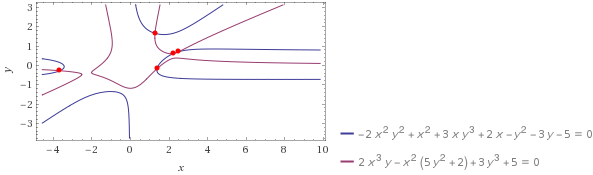

In [4]:
# Отстраиваю сетку по узлам которой произведу расчет корней.
# Параметры сетки подбираю таким образом, чтобы при максимальном шаге высчитывалось как можно больше корней
# Для нагладности подбор делаю вручную, но можно и автоматизировать.
# Колчество ячеек.
nx = 20
ny = 20
# Координата нулевой ячейки.
x0 = -5
y0 = -5
# Шаг ячейки.
dx = 2*abs(x0) / nx 
dy = 2*abs(y0) / ny
result = []
for x_index in range(nx):
    x0 += dx
    for y_index in range(ny):
        y0 += dy
        # Рассчитываем в узлах сетки значения корней системы уравнений.
        x, y = newton(f, f_prime, x0, y0)
        # Сохраняем результат.        
        result.append((round(x,7),round(y,7)))
# На вывод подаем только не повторяющиеся значения.
print (list(set(result)))

[(-3.65308, -0.2747634), (2.2177536, 0.610194), (2.4943565, 0.7083175), (1.3756871, -0.174758), (1.2733021, 1.6620391)]


In [5]:
# То же самое для fsolve.
nx = 20
ny = 20
x0 = 5
y0 = 5
dx = 2*abs(x0) / nx 
dy = 2*abs(y0) / ny
result = []
for x_index in range(nx):
    x0 -= dx
    for y_index in range(ny):
        y0 -= dy
        (x, y), info, ier, mesg = fsolve(equations, (x0, y0), full_output=True)
        if (ier == 1):
            result.append((round(x,7),round(y,7)))
print (list(set(result)))

[(-3.65308, -0.2747634), (2.2177536, 0.610194), (2.4943565, 0.7083175), (1.3756871, -0.174758), (1.2733021, 1.6620391)]
